In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

In [129]:
df_main = pd.read_csv('classify_delay_mf.csv')

In [130]:
df_main.head()

,CIRT_SERT_ABBREVIATION,PROM_CAUSE,PROM_REGN_CODE,REPORTED_HOUR,DELAY(HRS),DAY_OF_MONTH,DELAY_CATERGORY
0,V-VOICE COPPER,99-OUT OF ORDER,MB,9,3,14,A
1,V-VOICE COPPER,99-OUT OF ORDER,DYT,9,7,14,A
2,V-VOICE COPPER,99-OUT OF ORDER,BW,9,4,14,A
3,V-VOICE COPPER,99-OUT OF ORDER,TTY,9,2,14,A
4,V-VOICE COPPER,99-OUT OF ORDER,KG,9,5,14,A


In [132]:
df_main.isnull().sum()

CIRT_SERT_ABBREVIATION      0
PROM_CAUSE                  0
PROM_REGN_CODE            697
REPORTED_HOUR               0
DELAY(HRS)                  0
DAY_OF_MONTH                0
DELAY_CATERGORY             0
dtype: int64

In [133]:
## Filter the regions

In [134]:
df_regions = pd.read_excel('LEA_Mapping_New.xlsx')

In [135]:
df_regions.head()

,LEA,RTOM,MOPMC,OPMC,Province,Region,Zone
0,BKM,R-DB,DB,KY,CPN,CEN & UVA,CSRO II
1,HBR,R-DB,DB,KY,CPN,CEN & UVA,CSRO II
2,DB,R-DB,DB,KY,CPN,CEN & UVA,CSRO II
3,NL,R-DB,DB,KY,CPN,CEN & UVA,CSRO II
4,GLW,R-DB,DB,KY,CPN,CEN & UVA,CSRO II


In [137]:
df_regions = df_regions.rename(columns={'LEA': 'PROM_REGN_CODE'})

In [138]:
df_regions.isnull().sum()

PROM_REGN_CODE    1
RTOM              0
MOPMC             0
OPMC              0
Province          0
Region            0
Zone              0
dtype: int64

In [140]:
df_regions[df_regions.PROM_REGN_CODE.isnull()]

,PROM_REGN_CODE,RTOM,MOPMC,OPMC,Province,Region,Zone
204,NaN,R-RN,RN,RN,SAB,SAB & SP,CSRO I


In [142]:
df_regions.loc[204].PROM_REGN_CODE = "NA"

In [143]:
df_regions.isnull().sum()

PROM_REGN_CODE    0
RTOM              0
MOPMC             0
OPMC              0
Province          0
Region            0
Zone              0
dtype: int64

In [146]:
df_main_f = pd.merge(df_main, df_regions[['PROM_REGN_CODE']], on='PROM_REGN_CODE', how='inner')

In [147]:
df_main.shape, df_main_f.shape

((685391, 7), (684694, 7))

In [148]:
df_main_f.isnull().sum()

CIRT_SERT_ABBREVIATION    0
PROM_CAUSE                0
PROM_REGN_CODE            0
REPORTED_HOUR             0
DELAY(HRS)                0
DAY_OF_MONTH              0
DELAY_CATERGORY           0
dtype: int64

In [149]:
df_main_f.head()

,CIRT_SERT_ABBREVIATION,PROM_CAUSE,PROM_REGN_CODE,REPORTED_HOUR,DELAY(HRS),DAY_OF_MONTH,DELAY_CATERGORY
0,V-VOICE COPPER,99-OUT OF ORDER,MB,9,3,14,A
1,V-VOICE COPPER,99-OUT OF ORDER,MB,9,1,14,A
2,V-VOICE COPPER,99-OUT OF ORDER,MB,9,0,14,A
3,V-VOICE COPPER,99-OUT OF ORDER,MB,9,8,19,A
4,V-VOICE COPPER,99-OUT OF ORDER,MB,9,1,18,A


In [150]:
df_main_f.DELAY_CATERGORY.unique()

array(['A', 'C', 'B'], dtype=object)

In [151]:
d = {'A':0, 'B':1, 'C':2}

In [152]:
df_main_f.DELAY_CATERGORY = df_main_f.DELAY_CATERGORY.map(d)

In [155]:
df_main_f.dtypes

CIRT_SERT_ABBREVIATION    object
PROM_CAUSE                object
PROM_REGN_CODE            object
REPORTED_HOUR              int64
DELAY(HRS)                 int64
DAY_OF_MONTH               int64
DELAY_CATERGORY            int64
dtype: object

In [167]:
num_col = ['REPORTED_HOUR','DELAY(HRS)','DAY_OF_MONTH']

In [168]:
df_main_f_numeric = df_main_f[num_col]

In [169]:
df_main_f_numeric.head()

,REPORTED_HOUR,DELAY(HRS),DAY_OF_MONTH
0,9,3,14
1,9,1,14
2,9,0,14
3,9,8,19
4,9,1,18


In [170]:
from sklearn.preprocessing import StandardScaler

In [177]:
scaler = StandardScaler()
main_f_numeric_std = scaler.fit_transform(df_main_f_numeric)

In [183]:
df_main_f_numeric_std = pd.DataFrame(main_f_numeric_std,columns=['REPORTED_HOUR','DELAY(HRS)','DAY_OF_MONTH'])

In [185]:
df_main_f['REPORTED_HOUR'] = df_main_f_numeric_std['REPORTED_HOUR']
df_main_f['DELAY(HRS)'] = df_main_f_numeric_std['DELAY(HRS)']
df_main_f['DAY_OF_MONTH'] = df_main_f_numeric_std['DAY_OF_MONTH']

In [186]:
df_main_f.head()

,CIRT_SERT_ABBREVIATION,PROM_CAUSE,PROM_REGN_CODE,REPORTED_HOUR,DELAY(HRS),DAY_OF_MONTH,DELAY_CATERGORY
0,V-VOICE COPPER,99-OUT OF ORDER,MB,-0.932944,-0.856579,-0.141357,0
1,V-VOICE COPPER,99-OUT OF ORDER,MB,-0.932944,-0.948840,-0.141357,0
2,V-VOICE COPPER,99-OUT OF ORDER,MB,-0.932944,-0.994971,-0.141357,0
3,V-VOICE COPPER,99-OUT OF ORDER,MB,-0.932944,-0.625925,0.420964,0
4,V-VOICE COPPER,99-OUT OF ORDER,MB,-0.932944,-0.948840,0.308499,0


In [188]:
df_main_f_procssed = pd.get_dummies(df_main_f)

In [189]:
df_main_f_procssed.head()

,REPORTED_HOUR,DELAY(HRS),DAY_OF_MONTH,DELAY_CATERGORY,CIRT_SERT_ABBREVIATION_AB-CAB,CIRT_SERT_ABBREVIATION_AB-FTTH,CIRT_SERT_ABBREVIATION_AB-WIRELESS ACCESS,CIRT_SERT_ABBREVIATION_ADSL,CIRT_SERT_ABBREVIATION_BB-INTERNET,CIRT_SERT_ABBREVIATION_BB-INTERNET COPPER,...,PROM_REGN_CODE_WKN,PROM_REGN_CODE_WLW,PROM_REGN_CODE_WM,PROM_REGN_CODE_WP,PROM_REGN_CODE_WT,PROM_REGN_CODE_WTM,PROM_REGN_CODE_WU,PROM_REGN_CODE_WY,PROM_REGN_CODE_YA,PROM_REGN_CODE_YMH
0,-0.932944,-0.856579,-0.141357,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.932944,-0.948840,-0.141357,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.932944,-0.994971,-0.141357,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.932944,-0.625925,0.420964,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.932944,-0.948840,0.308499,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
df_features = df_main_f_procssed.drop(['DELAY_CATERGORY'],axis=1)

In [191]:
df_target = df_main_f_procssed[['DELAY_CATERGORY']]

In [193]:
df_features.shape, df_target.shape

((684694, 438), (684694, 1))

In [195]:
from sklearn.decomposition import PCA

In [196]:
pca = PCA()
pca.fit(df_features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

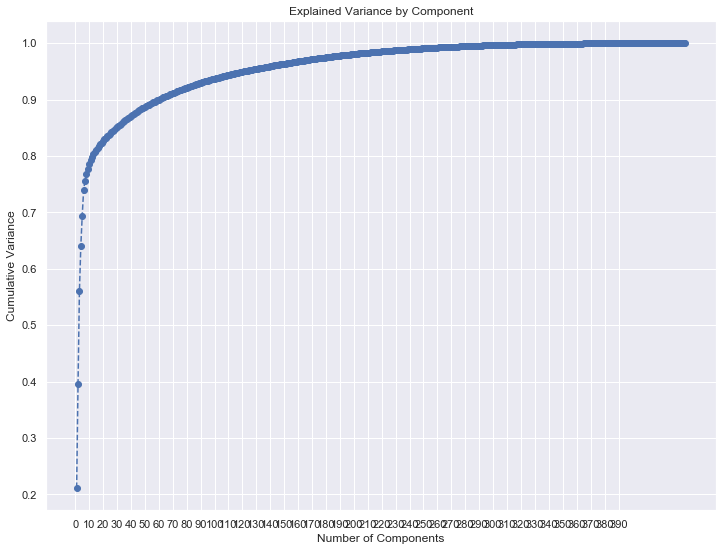

In [200]:
plt.figure(figsize=(12,9))
axis = plt.axes()
axis.set_xticks(np.arange(0,400,10))
plt.plot(range(1,(df_features.shape[1]+1)), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle = '--')
plt.title('Explained Variance by Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

In [201]:
# PCA = 10

In [202]:
pca = PCA(n_components=10)
pca.fit(df_features)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [203]:
scores_pca = pca.transform(df_features)

In [204]:
df_features_pca = pd.DataFrame(scores_pca, columns=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'])

In [205]:
df_features_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,-1.275771,-0.325651,0.102751,-0.504372,-0.684039,0.017348,0.034713,-0.027225,-0.063221,0.003885
1,-1.338605,-0.336777,0.036356,-0.508717,-0.683778,0.019531,0.036161,-0.027101,-0.062908,0.003600
2,-1.370023,-0.342340,0.003159,-0.510889,-0.683647,0.020623,0.036885,-0.027039,-0.062752,0.003458
3,-1.208369,0.256909,0.259406,-0.478581,-0.677983,0.005591,0.028167,-0.026673,-0.064638,0.005846
4,-1.410352,0.107019,0.028892,-0.496774,-0.678410,0.014493,0.033821,-0.026411,-0.063416,0.004600


In [206]:
df_target.head()

,DELAY_CATERGORY
0,0
1,0
2,0
3,0
4,0


In [207]:
from sklearn.model_selection import  train_test_split

In [208]:
x_train, x_test, y_train, y_test = train_test_split(df_features_pca, df_target , test_size=0.2, random_state=0)

In [209]:
import xgboost as xgb

In [210]:
train = xgb.DMatrix(x_train,y_train)
test = xgb.DMatrix(x_test,y_test)

In [211]:
param = {
    'max_depth':4,
    'eta':0.2,
    'objective':'multi:softmax',
    'num_class':3
}
epochs = 100

In [212]:
model = xgb.train(param,train,epochs)

In [213]:
predictions = model.predict(test)

In [214]:
from sklearn.metrics import accuracy_score

In [215]:
accuracy_score(predictions,y_test)

0.9821015196547368